# VAR

In [1]:
# To make realitve imports work
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# actual imports
from src.constants import YEARS, FIG_DIR, COL_STUDENT, COL_SALARY, COL_STUDENT_PRED, COL_SALARY_PRED
from src.dataLoading import getAllCourses, getTotalStudentsFor, getSalaries, getGraduatesInBwFor, getAllGraduatesYears, getInflationAdjustedBruttoSalary
import numpy as np
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
from tueplots import bundles
import pandas as pd

### Load data
Load the data for all three time-series.
Values range form 2007 to 2021 (inlcuding). This is limited by the salary data.

Load enrolled students for specified courses.

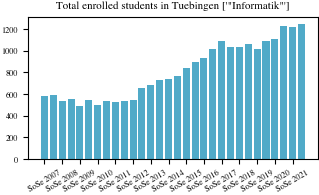

In [2]:

courses = getAllCourses() # if you use all options, dont put that in the title down marked  there
courses = ['"Informatik"']

interestingYears = YEARS[3:-4]

totalStudents = getTotalStudentsFor(courses = courses, years = interestingYears)
plt.rcParams.update(bundles.icml2022(column="half", nrows=1, ncols=1, usetex=False))
plt.bar(interestingYears, totalStudents, color=COL_STUDENT)
plt.xticks(ticks=interestingYears[::2], rotation=30)
plt.title(f'Total enrolled students in Tuebingen {[course for course in courses]}') # here is there :)
plt.show()

Load inflation adjusted brutto salary data for specified sector.

Create cummulative inflation:
2.3 -> 1.023
2.8 -> 1.051644
0.2 -> 1.053747288
1.1 -> 1.065338508168
2.5 -> 1.0919719708722
2.2 -> 1.1159953542313885
1.6 -> 1.1338512798990907
0.8 -> 1.1429220901382835
0.7 -> 1.1509225447692513
0.4 -> 1.1555262349483282
1.7 -> 1.1751701809424497
1.9 -> 1.1974984143803562
1.4 -> 1.2142633921816812
0.4 -> 1.219120445750408
3.2 -> 1.258132300014421

Adjust salary for inflation:
4211.5 -> 4116.813294232649
4251.0 -> 4155.4252199413495
4302.5 -> 4091.2133763897286
4317.0 -> 4105.001312231135
4349.0 -> 4127.175509276376
4375.0 -> 4151.8493568829945
4428.0 -> 4156.425367195795
4491.5 -> 4216.030834859963
4538.0 -> 4155.784325100693
4593.0 -> 4206.151918287238
4584.0 -> 4107.54398091299
4598.0 -> 4120.0888360030385
4597.0 -> 4054.323597367301
4655.5 -> 4105.9176653346685
4805.0 -> 4204.136083692842
4854.0 -> 4247.008647293455
4927.5 -> 4281.348056300275
5012.5 -> 4355.20185331408
4930.0 -> 4266.4544091640255
4999.0 -> 4326.1674627608445
5064.0 -> 4309.163117071

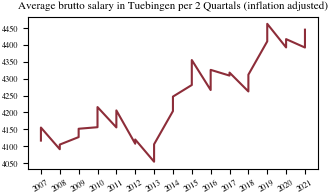

In [3]:
SECTOR = ('WZ08-62', 'Dienstleistungen der Informationstechnologie')
inflationAdjasutedBruttosalary = getInflationAdjustedBruttoSalary(SECTOR)

salaries = getSalaries()
salary_YEARS = salaries.index.levels[2]

plt.rcParams.update(bundles.icml2022(column="half", nrows=1, ncols=1, usetex=False))
plt.plot(salary_YEARS.repeat(2), inflationAdjasutedBruttosalary, color=COL_SALARY)
plt.xticks(ticks=salary_YEARS, rotation=30)
plt.title('Average brutto salary in Tuebingen per 2 Quartals (inflation adjusted)')
plt.show()

/Users/paulkaifler/AnalysingStudentDevelopment/src/dataLoading.py:34: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '56919.375' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  graduatesInBW.loc[2012, ('Abiturienten insg', 'Anzahl')] = newVal + diff/4
/Users/paulkaifler/AnalysingStudentDevelopment/src/dataLoading.py:34: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '56919.375' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  graduatesInBW.loc[2012, ('Abiturienten insg', 'Anzahl')] = newVal + diff/4


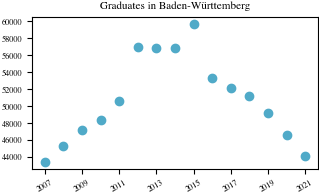

In [4]:
years = getAllGraduatesYears()
years = years[37:52]
graduatesInBW = getGraduatesInBwFor(years = years)


plt.rcParams.update(bundles.icml2022(column="half", nrows=1, ncols=1, usetex=False))
plt.scatter(years, graduatesInBW, color=COL_STUDENT)
plt.xticks(ticks=years[::2], rotation=30)
plt.title('Graduates in Baden-Württemberg')
plt.show()

### Simple VAR-Modell for one subject, with data per semester

The data ranges from 2007 to (including) 2021.
Limited by the salary data.

In [5]:
PAST_STEPS = 4
PREDICTION_STPES = 10
data = np.column_stack((totalStudents, inflationAdjasutedBruttosalary, graduatesInBW.repeat(2)))
completeDataDF = pd.DataFrame(data, index = YEARS[3:-4], columns = ['students', 'sallary', 'graduates'])
model = VAR(completeDataDF)

results = model.fit(maxlags=PAST_STEPS)
# Forecasting
lagged_values = data[-PAST_STEPS:]  # Use the last available values as lagged values
forecast = results.forecast(lagged_values, steps=PREDICTION_STPES)
print(forecast)

[[ 1228.36384634  4393.89449299 42166.26340836]
 [ 1227.03381275  4455.2006139  41391.46610704]
 [ 1213.49063993  4442.97809472 39539.44652084]
 [ 1207.58591248  4480.36369613 38328.76595889]
 [ 1197.75052182  4470.98301576 36954.47992952]
 [ 1187.9877323   4466.17598973 35983.381783  ]
 [ 1173.2560175   4443.48680566 35056.47637906]
 [ 1151.21892824  4424.89115799 34273.79693627]
 [ 1121.17827162  4410.18219121 33601.81355979]
 [ 1083.99862136  4402.88456731 33089.71770555]]


/Users/paulkaifler/miniconda3/envs/dataLiteracy/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/Users/paulkaifler/miniconda3/envs/dataLiteracy/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


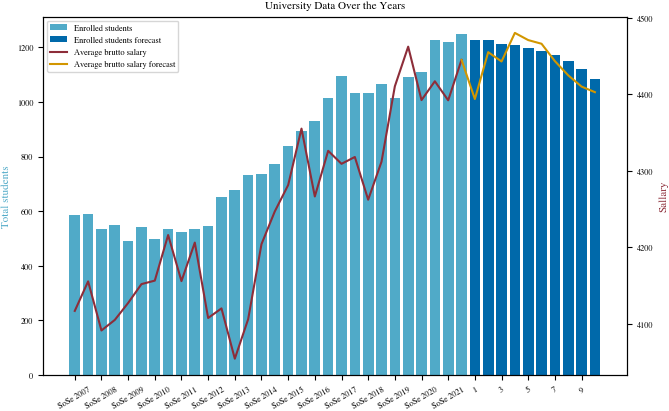

In [6]:
dataWithForecast = np.vstack((data, forecast))
yearsWithForecast = np.append(interestingYears, [f"{i+1}" for i in range(PREDICTION_STPES)])

plt.rcParams.update(bundles.icml2022(column="full", nrows=1, ncols=1, usetex=False))
fig, ax1 = plt.subplots()
plt.title('University Data Over the Years')
plt.xticks(rotation=30)


ax1.set_ylabel('Total students', color=COL_STUDENT)
# Plot main data
ax1.bar(yearsWithForecast[:-len(forecast)], dataWithForecast[:-len(forecast), 0], color=COL_STUDENT, label='Enrolled students')

# Plot forecast with a different color
ax1.bar(yearsWithForecast[-len(forecast):], dataWithForecast[-len(forecast):, 0], color=COL_STUDENT_PRED, label='Enrolled students forecast')


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Sallary', color=COL_SALARY)

# Plot main data
ax2.plot(yearsWithForecast[:-len(forecast)], dataWithForecast[:-len(forecast), 1], color=COL_SALARY, label='Average brutto salary')

# Plot forecast with a different color
ax2.plot(yearsWithForecast[-len(forecast) - 1:], dataWithForecast[-len(forecast) - 1:, 1], color=COL_SALARY_PRED, label='Average brutto salary forecast')

# Create one legend for both subplots
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Get current ticks, keep only every second tick
locs, labels = plt.xticks()
plt.xticks(locs[::2], labels[::2])

plt.savefig(FIG_DIR + '/predictingStudents.pdf')
plt.show()